# Intro to Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# fix the random seed, allows for reproducibility
np.random.seed(0)

### Let's generate some dummy data to work with

Let's generate 1,000 normally distributed samples with mean 1.5 and standard deviation 2.

\begin{align}
    \mathbf{X} \sim \mathcal{N}(\mu=1.5,\,\sigma^{2}=4) \\
\end{align}

In [3]:
X = 1.5 + (2 * np.random.randn(1_000)) 

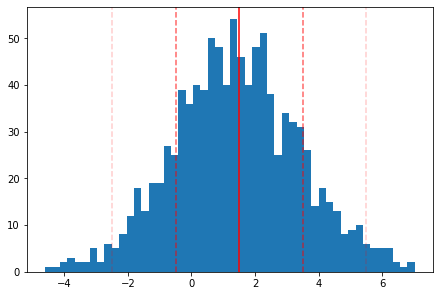

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4), constrained_layout=True)

ax.hist(X, bins=50);
ax.axvline(1.5, color='r', linestyle='-')
ax.axvline(1.5 + 2, color='r', linestyle='--', alpha=0.6)
ax.axvline(1.5 - 2, color='r', linestyle='--', alpha=0.6)
ax.axvline(1.5 + 2*2, color='r', linestyle='--', alpha=0.2)
ax.axvline(1.5 - 2*2, color='r', linestyle='--', alpha=0.2)

plt.show()

We're going to introduce some random error to the output of the function we're trying to approximate.

\begin{align}
    \mathbf{\epsilon} \sim \mathcal{N}(\mu=0,\,\sigma^{2}=0.25) \\
\end{align}

In [5]:
res = (0.5 * np.random.randn(1_000))

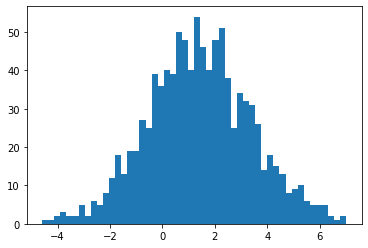

In [6]:
plt.hist(X, bins=50);

This function mapping from $\mathbf{X}$ to $\mathbf{y}$ is what we will try to approximate with our regression model.

\begin{align}
    \mathbf{y} = 2 + 0.3 \times \mathbf{X} + \mathbf{\epsilon} \\
\end{align}

In [7]:
y = 2 + (0.3 * X) + res

#### The challenge is, using the samples we have, to approximate this function

### What does our data look like? 

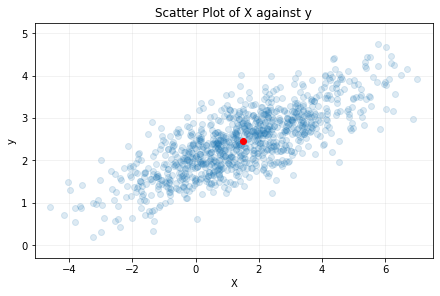

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4), constrained_layout=True)

ax.scatter(X, y, alpha=0.15)
ax.grid('-', alpha=0.2)

# Centre of our data
ax.plot(1.5, 2.45, 'ro')

ax.set_title('Scatter Plot of X against y')
ax.set_xlabel('X')
ax.set_ylabel('y')

ax.set_xlim(min(X) - 0.5, max(X) + 0.5)
ax.set_ylim(min(y) - 0.5, max(y) + 0.5)

plt.show();

### Let's include the function we're trying to approximate 

In [9]:
X_line = range(int(min(X) - 2), int(max(X) + 2))
y_line = [2 + (0.3 * X_i) for X_i in X_line]

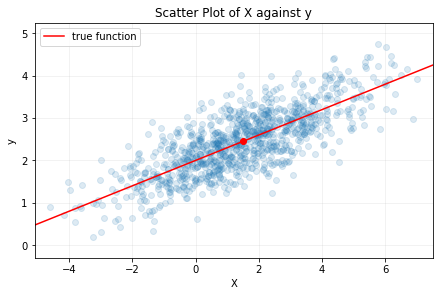

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4), constrained_layout=True)

ax.scatter(X, y, alpha=0.15)
ax.grid('-', alpha=0.2)

ax.plot(X_line, y_line, 'r', label='true function')
ax.legend(loc='upper left')

ax.plot(1.5, 2.45, 'ro')

ax.set_title('Scatter Plot of X against y')
ax.set_xlabel('X')
ax.set_ylabel('y')

ax.set_xlim(min(X) - 0.5, max(X) + 0.5)
ax.set_ylim(min(y) - 0.5, max(y) + 0.5)

plt.show();

## Let's begin fitting a model

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### First we want to split our samples into a 70/30 training and test split so we can later evaluate our model

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
lr_model = LinearRegression()

In [14]:
# useful command to get docs in jupyter
lr_model?

Type:        LinearRegression
String form: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
File:        ~/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/base.py
Docstring:  
Ordinary least squares Linear Regression.

Parameters
----------
fit_intercept : boolean, optional, default True
    whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (e.g. data is expected to be already centered).

normalize : boolean, optional, default False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
    an estimator with ``normalize=False``.

copy_X : boolean, optional, default True
    If True, X will be copied; else, it may b

#### Scikit-learn has a really annoying convention where it expects a 2d array for X, even if it's just a single feature

In [15]:
X_train.shape

(700,)

In [16]:
y_train.shape

(700,)

In [17]:
lr_model.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.43948437e-01  5.23511598e+00  1.07451944e+00  5.34588405e+00
 -1.30269459e+00  2.83276616e+00 -1.31583084e-01  2.38772647e+00
 -2.56380686e-01  1.23789198e+00  2.36621591e+00  2.58662378e+00
 -1.76039669e+00  1.82894066e-01  1.26779212e+00  3.26035782e+00
 -1.39306940e+00  5.38724237e+00  4.44264391e+00  2.00499325e+00
  1.88062312e+00  1.99229558e+00  1.69480033e+00  3.29111197e+00
 -1.60085869e+00  3.55787099e+00  1.54270245e+00  4.71532068e-01
  1.55079104e-01 -3.26158436e-01 -1.13181482e+00 -4.57659719e-01
  1.75796582e+00  4.15292328e+00  3.80466313e+00 -8.69373181e-01
 -2.05533391e+00  2.07380898e+00 -1.86243643e+00 -4.04518551e+00
  2.74071660e+00  8.78227657e-01  2.55788724e+00  1.22810060e+00
 -2.90933122e-01  6.87393739e-01  3.12903964e+00 -2.08265510e+00
  4.24197801e+00  1.15690734e+00  3.45747597e+00  1.83334699e+00
  2.85381607e+00 -3.94977190e-01  2.94873701e+00  7.17565896e-01
  8.93803493e-01  1.41719838e+00  3.94918653e-01  1.20073092e+00
  4.21734726e-01  1.67684417e+00  3.03580482e+00 -1.75356084e-01
  3.15997232e+00  1.73029575e+00  2.33210009e+00  3.44507158e+00
  2.78662893e+00  4.80313516e-01 -6.98801581e-01  1.29131302e+00
  2.32574164e+00  5.41182462e+00  1.91066513e+00  1.86785099e+00
  1.84500883e+00 -7.05812426e-01  4.86315343e+00  3.01148058e+00
  7.10300972e-01 -2.42290238e-02  5.58724684e-01  8.05098695e-01
 -1.87646006e+00  2.40186892e+00  1.41565710e+00  6.88116546e-01
 -4.29212848e-01  1.87072650e-01  4.53652234e+00  4.09565053e+00
  8.90072724e-01 -2.64837637e-01  1.14015033e+00 -9.88447991e-02
  4.48815815e+00 -9.17147307e-01  1.79887360e-01  5.35906411e+00
  3.52368487e+00  3.76615976e+00 -7.73385090e-02  3.14700831e+00
  1.08340249e+00  2.20356022e+00  6.10783340e+00  2.67975964e+00
  3.37463046e-01 -2.97920812e+00  1.86667840e+00  2.25847107e+00
 -2.13098616e-01  2.08740072e-02  4.05215069e+00  4.60448636e+00
  7.92012177e-01  1.97948813e-01  1.06653706e+00  1.27922140e+00
  4.15812569e+00 -1.34986195e-01  3.21366122e+00  1.96964305e+00
 -9.50871038e-01  4.15002811e+00  1.26754060e+00 -7.31793972e-01
 -9.53243319e-01  5.00997231e+00  2.67451876e+00  7.30709154e-01
 -1.58159403e+00 -4.71021475e-01  3.05498071e+00 -2.41594298e-01
  1.78808714e+00  2.26546486e+00  5.62271624e-01  5.32012991e+00
  3.14049567e+00  1.95121731e+00  1.21086637e+00 -1.16442331e+00
  2.71768767e+00 -1.82139962e+00  1.39486541e+00  2.25830347e+00
  5.13360233e-01  5.49591216e+00 -1.15296975e-01  1.42846386e+00
  1.38506096e+00  7.01871023e+00  3.25166552e+00  3.75327184e+00
 -1.02613670e+00  2.31355813e-01  1.02415654e+00  9.04418241e-01
  1.73043427e-01  2.10494380e+00  2.04903272e+00 -7.36623849e-01
  4.48896909e+00  1.23402316e+00  3.60890345e+00  4.10369246e+00
  5.72808051e-01  1.55081042e+00  1.19445115e+00  3.09334422e+00
  1.95116333e+00  2.45379674e+00  6.68884918e+00 -3.22834763e+00
 -8.62347254e-02  9.19205798e-01  7.58591994e-01  3.65639461e+00
  2.48748355e+00  7.59515119e-01  2.75046290e+00  2.31040816e+00
  2.09647635e+00  3.22519202e+00  2.06855934e+00  7.41704874e-01
  2.23169758e+00  2.32119700e+00  2.88085805e+00 -2.81830166e-01
  4.27829063e+00  2.31283099e+00  3.29137591e-01  2.71263905e+00
  2.54008123e+00  3.14317142e+00 -8.36186995e-01  4.12494073e+00
  1.78390633e+00  2.21096359e+00 -8.45733236e-02 -4.59228611e+00
  1.89860039e+00  1.60389079e+00  1.32813847e+00  3.14281187e+00
  3.91380747e-01  2.11666249e+00  3.19884708e-01  2.87963633e+00
 -1.58954219e+00  8.48661062e-01 -1.57248737e+00  3.22887240e+00
  4.34594416e-01 -3.07724008e+00 -2.94680630e+00  3.35901022e+00
  1.85485228e+00  2.49738055e+00 -2.15948082e+00 -3.60313005e-01
  7.15222004e-01 -3.36009540e-01  1.64559427e-01  3.65838946e+00
 -3.61836933e+00  6.96438128e-01  1.59026803e+00  3.75718813e+00
 -7.56022663e-01  2.88949829e+00  2.03410174e+00  3.31208932e+00
  1.51058529e+00  1.59151703e+00  5.71324617e-01  6.79236413e-01
  1.45315379e+00 -1.66587679e+00  5.52812031e+00 -1.40873135e+00
  4.86384348e+00  7.68897820e-01 -1.05832221e+00  6.01344699e+00
  1.36573169e+00  1.01596034e+00  5.78560425e-01  2.54212975e+00
  1.81301308e+00  9.72125303e-01  2.36192484e-01 -9.35877023e-01
  1.69544994e+00  7.05456371e-01  1.61785118e+00 -7.95221890e-01
  4.10285614e+00  1.60314989e+00  1.64574559e-01  5.95188866e+00
  1.02124164e+00  4.24992813e+00 -8.55257925e-01 -1.51399680e+00
 -2.01178117e+00 -1.33381223e+00 -1.34812182e+00  1.82185634e+00
  4.57275411e+00 -1.26292564e-01  2.41483121e+00  4.32234413e+00
  1.60190855e+00  1.06091794e+00 -8.67761280e-01 -2.46159294e+00
 -2.75571495e-01 -1.06910460e+00  4.68554151e+00  1.19728558e+00
  1.52446397e+00  2.78026305e+00 -1.38988040e+00  2.30397873e+00
  2.39942420e+00  7.49705767e-01  7.26258306e-01 -3.65481822e-01
  4.30268966e+00 -6.54198139e-01  6.89244811e+00  1.11869301e+00
  2.21273279e+00  1.14282182e+00  1.46595917e+00  1.47028459e+00
 -2.99064330e+00  3.77378273e+00  3.36369675e+00  1.74335003e+00
 -1.09737344e+00  4.34596699e+00  3.02207545e+00  2.12963441e+00
  1.13551043e+00  1.03156840e+00 -1.19551812e+00 -1.85200761e+00
 -8.77889910e-01  4.21989708e+00 -2.75560273e-01  2.11750248e+00
  2.17780825e+00  2.39639057e+00  2.07824101e+00  2.20563321e+00
 -1.37558295e+00 -8.30299682e-01 -1.25616693e+00 -2.08845854e+00
  8.04076288e-01  2.01324145e-01  2.04234037e+00  2.30031442e+00
  3.45327807e+00  5.54208712e+00  1.34429049e+00  8.05440683e-02
  2.30652908e+00  4.09569158e+00  2.27456095e+00  5.09037712e-03
  5.67161807e-01  3.94489014e+00  2.57849838e+00  2.95818112e+00
  8.86468448e-01  2.72385439e+00  3.54358117e+00  2.13388522e+00
  1.82785714e+00  7.30240382e-01  1.98888691e+00  3.07160765e+00
  8.76894936e-01 -8.58315861e-01  8.76047784e-01  1.36351679e+00
  1.07166669e+00  2.61157393e+00  1.36544878e+00 -6.41505243e-01
  3.04281190e+00  2.25632504e+00  9.76709109e-01 -2.06312571e+00
  5.07795332e-01  2.25285106e+00  4.03015568e+00  2.40497819e+00
  1.08619265e+00  6.79900614e-01  1.40859208e+00  1.38282690e+00
 -6.09256928e-01 -1.50479314e+00 -4.54555760e-01  2.63458056e+00
 -1.20677772e+00  1.62652399e+00  2.24011178e+00  2.54778205e+00
  3.14064359e+00  3.22810460e+00 -1.70411531e+00  7.83771849e-01
  3.49423596e+00  8.81974062e-01  3.98663877e+00 -1.58317480e+00
 -3.81123819e+00 -4.42209141e-01  4.88052431e-02  2.29809269e+00
  4.13827375e+00  4.84964797e-01  1.25401926e-01 -1.00559072e+00
  3.04358110e+00 -1.18299345e+00  6.21620956e-01  3.66275207e+00
  3.42300670e-01  1.81340771e+00 -2.53281326e+00  8.49886050e-02
  1.23423884e+00  3.48424060e-01  3.54034542e+00  2.39381816e-02
  3.21584785e+00 -1.31192583e+00  1.69890891e+00  1.23259688e+00
  9.64810508e-01  2.43132488e+00  7.69889567e-01  7.09542035e-01
  1.95412800e-01  4.79414521e-01  9.39289010e-01  1.79689916e+00
  1.78412361e+00  5.98178640e+00  9.47134310e-01 -5.90506732e-01
  6.32490736e+00 -2.43724938e+00  3.90475970e+00  3.30165297e+00
  2.49610481e+00  2.07268738e+00  1.81269794e+00  5.88934993e-01
  3.02692126e-01  1.05148213e+00  2.66590736e+00  2.85286659e+00
 -3.66559327e+00  1.80216541e-01  4.21090733e-01  5.73358204e+00
  1.00108284e+00  4.47871192e+00 -1.73294838e+00 -1.11305370e+00
  9.63993258e-01  2.13432125e+00  2.21258563e+00 -4.92425281e-01
  9.26225615e-01  1.97620630e+00  2.89691430e+00  6.18154735e-01
  1.27891869e+00  1.21101631e-01  2.16734865e+00  3.68927675e+00
  2.10720781e+00  3.63701880e+00  1.12989266e+00  1.57953347e+00
  4.56840644e-01 -8.61264368e-01 -2.03707690e+00 -5.59870567e-01
  3.23792697e+00  8.07501105e-01  1.51334679e-01  2.19930891e+00
  4.14277048e-01  2.03980871e+00 -1.19343501e+00  2.44086629e+00
 -6.22444575e-01 -4.21008763e-01 -2.82878478e-02  2.27380500e+00
 -2.17944777e-01  2.03137595e+00  3.43879342e+00  2.17992997e+00
  3.22703932e+00 -3.25566988e-01 -1.26672791e+00  3.48878878e+00
 -1.82319658e+00  8.75415498e-01  1.27044935e+00  2.62801707e+00
  2.42556451e+00  2.22896250e+00 -6.86123017e-01  3.38183523e+00
  2.01743288e+00  1.24324778e-01  5.44051992e-01 -1.63553545e+00
  4.22906370e+00  6.91935412e-01  3.23481482e+00 -2.08191479e-01
  1.18466597e+00  2.44449430e+00  5.29177835e+00 -7.53651618e-01
 -1.26728518e-01  4.98533756e+00  1.39643592e-01 -2.40360820e+00
  2.84114090e+00  3.65548761e+00  1.49722991e+00  1.07346692e-01
  8.61343166e-01  1.29743703e+00 -5.68485684e-01  1.27506803e+00
  1.05478864e+00 -1.70367210e+00  1.03306668e+00  1.37674720e+00
  1.43151544e+00  1.18085312e+00  1.96436207e+00  2.13443643e+00
  1.05464980e+00  6.49440078e+00  7.35949102e-01 -1.05937835e+00
  3.56881977e+00  4.80695636e-01  7.72282380e-01 -6.52583117e-02
 -3.97935433e+00  9.64532926e-01  2.85292146e+00  3.38493624e+00
  2.15924596e+00  4.89283365e-01  7.35982089e-01 -1.42346538e+00
 -1.19585085e+00 -3.14043890e-02  2.89876097e+00  3.38609217e+00
  3.69931919e+00  1.46863578e+00 -2.28089982e-01  7.01101941e-01
  1.93901911e+00  2.86318904e+00 -2.14851331e+00  5.03935099e-01
  4.35020162e-01  1.39879292e+00 -4.16910901e+00 -1.08571382e+00
  2.94006752e+00  8.08036449e-01  2.38206581e+00  1.61978937e+00
  1.54922425e+00  4.79626986e+00  5.14544720e+00 -2.68920614e+00
  5.52251336e+00  1.94101531e+00  1.92299403e+00 -1.72175681e+00
  1.50754178e+00 -2.18613910e+00  1.30369922e+00  4.78389725e-01
  3.61375893e-01  2.39078650e+00  8.64913812e-01  2.84458951e+00
  3.65923718e+00  2.30952362e+00  2.93996746e+00  3.10112961e+00
 -5.00430695e-01  2.51447790e+00  1.74744383e+00  4.15556539e+00
  6.19329406e+00  2.05984920e+00  2.81052746e+00 -3.14596729e-01
  5.82647190e+00 -1.11253015e-01 -1.96641046e-01  1.10864281e-01
  1.56699592e-02 -5.36083751e-01  2.55400842e+00  3.85755914e+00
  2.86900221e+00  5.97393926e-01  3.01079139e+00  2.72815874e+00
  1.47770878e+00  2.12763194e-01 -3.01112846e+00  1.64917281e+00
  1.86267686e+00 -1.34003587e+00  2.13745531e+00 -2.26917169e+00
  1.35542598e+00  3.96058136e+00  3.37289145e+00  3.20510388e+00
  4.56555843e+00  1.35215067e+00  3.05367862e-01 -9.69651641e-01
  1.45134775e+00  1.68870318e+00  1.57726110e+00  7.25346365e-01
  3.04538967e+00  2.42626066e+00  2.25125949e-01  3.59594431e+00
 -6.03760205e-01  6.03669275e-01 -2.90288257e+00  5.40688372e-01
 -8.18841033e-01  1.94768713e+00  8.04175701e-01  6.03950925e+00
  2.23508979e+00  1.69579229e+00 -6.68073241e-01  5.93228392e-01
  1.80989485e+00  2.54260750e+00 -3.17526492e-01 -1.25985977e-01
  4.37009877e+00  2.85994969e+00  6.26503325e-01  8.95500539e-01
  1.44363554e+00  2.20951539e+00  5.19918249e+00 -2.05171694e-01
 -1.80580791e-01  1.95478555e+00 -1.48251519e+00  3.66387044e+00
  3.29052055e+00  5.23511792e+00  3.37618508e+00 -2.77942716e-01
  1.85163791e+00  4.23519448e+00  6.51364758e-01  2.40756383e+00
  1.23978609e+00  2.72075876e+00 -1.76526905e+00  2.66444918e+00
  1.69264271e+00 -1.44367001e+00 -1.63398942e+00  4.93917861e+00
  3.56087653e+00  1.53855877e+00  4.89236315e+00  7.60397667e-01
 -2.39140617e+00 -3.77963145e-01  1.88858588e+00  2.79011055e+00
 -6.20031645e-01  2.00296883e+00  1.23618272e+00  2.12289414e+00
  2.37248023e-01  5.76773649e+00  2.14973923e+00 -1.89621164e+00
  6.19310594e-04  1.68790646e+00  6.50673395e-01  9.48658931e-01
  6.87856407e-01  2.31492367e+00 -5.97105930e-01  1.11364660e+00
  5.62898572e+00  6.17924961e+00  8.95394499e-01  2.65318163e+00
  6.29692897e-01  2.34525724e+00 -1.02993771e-01  4.43315743e+00
  2.49200189e+00  1.09420632e+00  3.06991504e+00  2.25375304e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [18]:
X_train = X_train.reshape(-1, 1)

In [19]:
X_train.shape

(700, 1)

## Let's fit our model using the training data

In [20]:
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### What paramater values did we get?

In [21]:
print(f"Intercept: {lr_model.intercept_:.4f}, Coefficients: {lr_model.coef_}")

Intercept: 2.0342, Coefficients: [0.29035291]


Remember our true function was $\mathbf{y} = 2 + 0.3 \times \mathbf{X}$

#### How do they compare?

In [22]:
X_fitted_line = range(int(min(X) - 2), int(max(X) + 2))
y_fitted_line =  lr_model.predict(np.array(X_line).reshape(-1, 1))

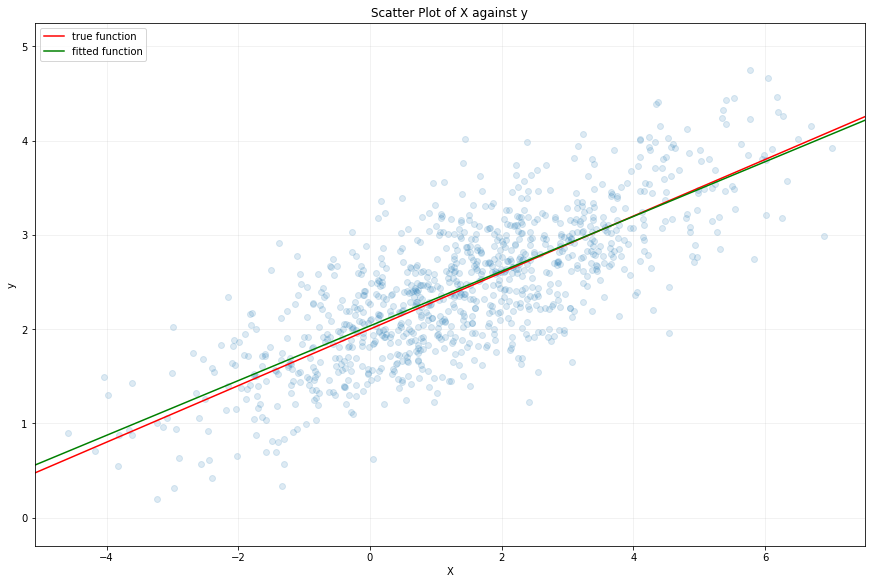

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), constrained_layout=True)

ax.scatter(X, y, alpha=0.15)
ax.grid('-', alpha=0.2)

ax.plot(X_line, y_line, 'r', label='true function')
ax.legend(loc='upper left')

ax.plot(X_fitted_line, y_fitted_line, 'g', label='fitted function')
ax.legend(loc='upper left')

ax.set_title('Scatter Plot of X against y')
ax.set_xlabel('X')
ax.set_ylabel('y')

ax.set_xlim(min(X) - 0.5, max(X) + 0.5)
ax.set_ylim(min(y) - 0.5, max(y) + 0.5)

plt.show();

#### Error Metric

Mean squared error MSE = $\frac{1}{n}\sum_{t=1}^{n} (Y_i - \hat{Y_i})^2$ 

In [27]:
from sklearn.metrics import mean_squared_error

In [30]:
print(f'Mean Squared Error: {mean_squared_error(y_test, lr_model.predict(X_test.reshape(-1, 1))):.4f}')

Mean Squared Error: 0.2028
